# Module Twelve Group Discussion, House Sales EDA

In [1]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import sys

%alias head powershell -command "& {Get-Content %s -Head 10}"

%alias tail powershell -command "& {Get-Content %s -Tail 10}"

sns.set(style="whitegrid")

Let's start by taking a peak at the data and any descriptive headers that may be included:

In [2]:
%head 'real-estate-data.csv'

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
2014-05-02 00:00:00,550000.0,4.0,2.5,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
2014-05-02 00:00:00,490000.0,2.0,1.0,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
2014-05-02 00:00:00,335000.0,2.0,2.0,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
2014-05-02 00:00:00,482000.0,4.0,2.5,2710,35868,2

For single variable EDA, start by looking at sqft_living, condition, city, bathrooms, and floors.

In [3]:
data = pd.read_csv("real-estate-data.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


The data types for the variables look to be self-explanatory, but just in case, enumerate the types.

In [4]:
eda_data = data[["sqft_living", "condition", "city", "bathrooms", "floors", "price"]]
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 6 columns):
sqft_living    4600 non-null int64
condition      4600 non-null int64
city           4600 non-null object
bathrooms      4600 non-null float64
floors         4600 non-null float64
price          4600 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 215.7+ KB


Here's what was gleaned from initial inspection of the data.

<table class="variable-table">
            <thead>
                <tr>
                    <th><center>Variable Name</center></th>
                    <th><center>Variable Type</center></th>
                    <th><center>Computer Data Type</center></th>
                    <th><center>Description</center></th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>sqft_living</td>
                    <td>Numerical</td>
                    <td>Integer</td>
                    <td>Square footage of the house</td>
                </tr>
                <tr>
                    <td>Condition</td>
                    <td>Numerical</td>
                    <td>Integer</td>
                    <td>Numerical grading of the condition of the property</td>
                </tr>
                <tr>
                    <td>City</td>
                    <td>Categorical</td>
                    <td>Object - String</td>
                    <td>Name of the city where the property is located</td>
                </tr>
                <tr>
                    <td>Bathrooms</td>
                    <td>Numerical</td>
                    <td>Float</td>
                    <td>Number of bathrooms (including half baths) in the house </td>
                </tr>
                <tr>
                    <td>Floors</td>
                    <td>Numerical</td>
                    <td>Float</td>
                    <td>Number of floors (including half floors) in the house </td>
                </tr>
                <tr>
                    <td>Price</td>
                    <td>Numerical</td>
                    <td>Float</td>
                    <td>Price the property sold for in USD</td>
                </tr>
            </tbody>
        </table>

## Single Variable EDA

### Sqft_living

With this numerical variable, looking to have enough values across the distribution to provide accurate predictions for houses of all sizes. Knowing what distribution could be used to model it will also be helpful in analysis down the road.

In [5]:
eda_data["sqft_living"].describe()

count     4600.000000
mean      2139.346957
std        963.206916
min        370.000000
25%       1460.000000
50%       1980.000000
75%       2620.000000
max      13540.000000
Name: sqft_living, dtype: float64

It looks like there may be some very large homes in this data set. This may overinflate price values because of how different it is in terms of magnitude.

### Condition

There wasn't a definition of condition provided with the data, but it can be assumed that higher condition values means the home is in better condition.

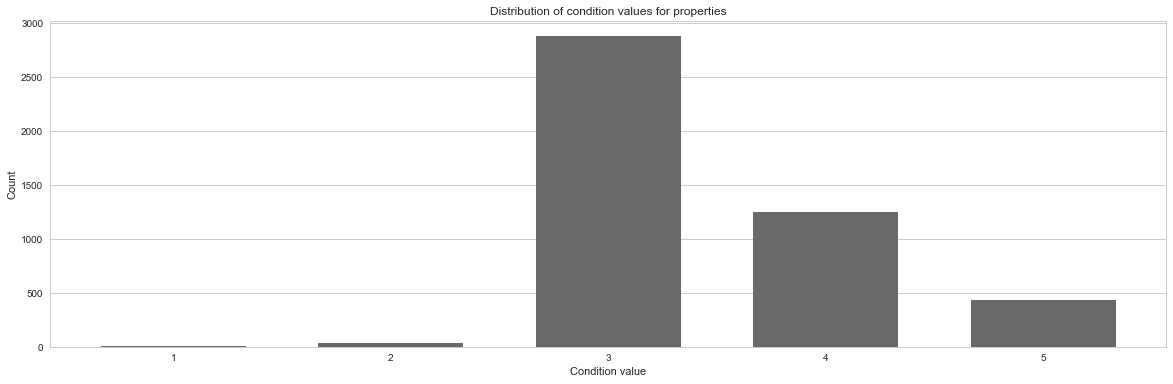

In [6]:
condition_counts = eda_data["condition"].value_counts().sort_index()
x = range( len( condition_counts))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, condition_counts, width, color="dimgray", align="center")
axes.set_xticks(x)
axes.set_xticklabels(condition_counts.axes[0])
axes.set_title( "Distribution of condition values for properties")
axes.set_xlabel("Condition value")
axes.set_ylabel( "Count")
axes.xaxis.grid(False)

plt.show()
plt.close()

There is definitely a shortage of poorer conditioned homes that were evaluated. There is also a massive spike of fair conditioned homes. Models built on this data may overvalue poor conditioned homes and undervalue good/great conditioned homes.

### City

It may be helpful to convert this variable later on to some sort of numeric variable; lat/lon coordinates maybe. Then some more in-depth analysis of proximity to other location's effect on price. For now, just looking at the distribution of evaluated properties across the cities.

In [7]:
pd.DataFrame(eda_data["city"].value_counts().sort_index())

,city
Algona,5
Auburn,176
Beaux Arts Village,1
Bellevue,286
Black Diamond,9
Bothell,33
Burien,74
Carnation,22
Clyde Hill,11
Covington,43


It makes sense that at first glance the number of evaluated properties is higher in urban areas than in rural areas. It may follow that the model is better at predictions for properties located in cities than it is for properties in rural areas.

### Bathrooms

All of these values should be in half increments, and the spread of the number of bathrooms should roughly coincide with how the square footage of homes is distributed. So there should only be a handful of properties with a large amount of bathrooms.

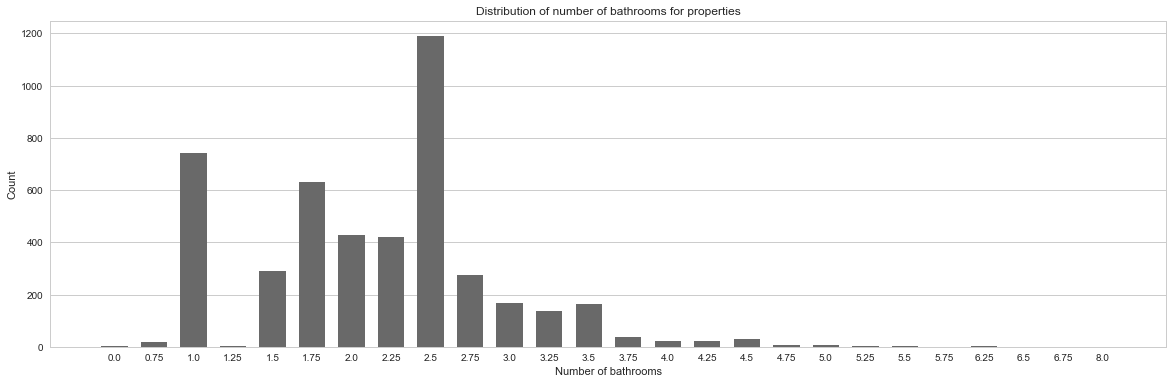

In [8]:
bathroom_counts = eda_data["bathrooms"].value_counts().sort_index()
x = range( len( bathroom_counts))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, bathroom_counts, width, color="dimgray", align="center")
axes.set_xticks(x)
axes.set_xticklabels(bathroom_counts.axes[0])
axes.set_title( "Distribution of number of bathrooms for properties")
axes.set_xlabel("Number of bathrooms")
axes.set_ylabel( "Count")
axes.xaxis.grid(False)

plt.show()
plt.close()

As expected the counts tail off at larger number of bathrooms. 2.5 bathrooms definitely dominates the data set but a normal model still could feasibly model this distribution; the only problem is with the count of properies with only one bathroom.

### Floors

Domain knowledge doesn't tell us much to expect for this distribution of values other than to expect the data set to be dominated by one and two floor homes. However, not certain if this should coincide with the distribution of square footage because a large home could techinically be a one-story rancher.

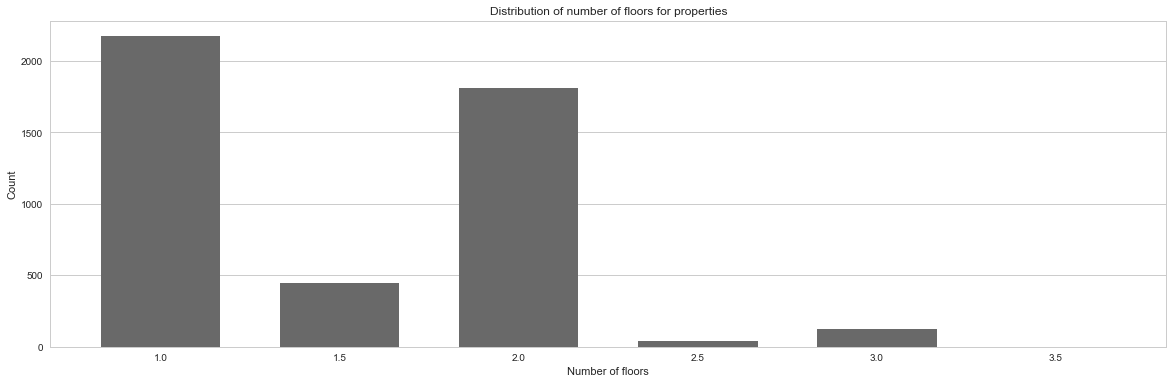

In [9]:
floor_counts = eda_data["floors"].value_counts().sort_index()
x = range( len( floor_counts))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, floor_counts, width, color="dimgray", align="center")
axes.set_xticks(x)
axes.set_xticklabels(floor_counts.axes[0])
axes.set_title( "Distribution of number of floors for properties")
axes.set_xlabel("Number of floors")
axes.set_ylabel( "Count")
axes.xaxis.grid(False)

plt.show()
plt.close()

Appears that this is best modeled by some form of bimodal distribution. Definitely follows the assumption of being dominated by values of one and two floor homes.

### Price

Expect to see all positive values here with a distribution that can be well modeled by a normal distribution. This comes from domain knowledge about real estate prices in a small fixed area.

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

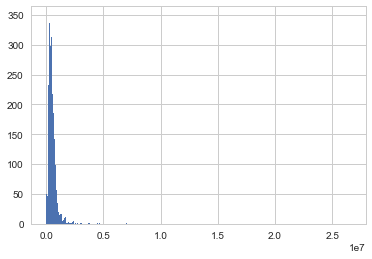

In [10]:
prices = eda_data["price"]
bins = np.histogram_bin_edges(prices, bins='fd')
plt.hist(prices, bins=bins)
prices.describe()

The large difference in magnitudes of some of the homes makes the histogram not such a great representation of this subset of the data. The data description gives some insight into the values; particulary that some zero vales do exist in the data set and that the large difference of magnitudes doesn't drive up the mean that much.

## Pairwise EDA

### Functions

Module 5 provided some helpful functions which are included here for future usage.

In [11]:
def display_dict(m, precision = 3):
    table = "<table>"
    for item in m.items():
        table += ("<tr><th>{0}</th><td>{1:." + str(precision) + "f}</td></tr>").format(*item)
    table += "</table>"
    return display(HTML(table))

def calculate_tukey_five(data):
    min, q1, q2, q3, max = np.concatenate([[np.min(data)], stats.mstats.mquantiles( data, [0.25, 0.5, 0.75]),[np.max(data)]])
    data = {"Min": min, "Q1": q1, "Q2": q2, "Q3": q3, "Max": max}
    return data

def calculate_tukey_dispersion(five):
    data = {
        "Range": five["Max"] - five["Min"],
        "IQR": five["Q3"] - five["Q1"],
        "QCV": (five["Q3"] - five["Q1"]) / five["Q2"]
    }
    return data

def restyle_boxplot(patch):
    ## change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    ## change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    ## change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    ## change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

    for box in patch["boxes"]:
        box.set( facecolor='#FFFFFF', alpha=0.5)

In [12]:
def correlation(data, x, y):
    print("Correlation coefficients:")
    print( "r   =", stats.pearsonr(data[x], data[y])[0])
    print( "rho =", stats.spearmanr(data[x], data[y])[0])

In [13]:
def describe_by_category(data, numeric, categorical):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    print(grouped_y)

In [14]:
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):

    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)

    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs( 0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="DimGray", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")

    title = "Plot of {0} v. {1}".format(x, y)
    if not skip_lowess:
        title += " with LOWESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)

    plt.show()
    plt.close()

In [15]:
def multiboxplot(data, numeric, categorical, skip_data_points=True):
    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)

    grouped = data.groupby(categorical)
    labels = pd.unique(data[categorical].values)
    labels.sort()
    grouped_data = [grouped[numeric].get_group( k) for k in labels]
    patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1)
    restyle_boxplot( patch)

    if not skip_data_points:
        for i, k in enumerate(labels):
            subdata = grouped[numeric].get_group( k)
            x = np.random.normal(i + 1, 0.01, size=len(subdata))
            axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)

    axes.set_xlabel(categorical)
    axes.set_ylabel(numeric)
    axes.set_title("Distribution of {0} by {1}".format(numeric, categorical))

    plt.show()
    plt.close()

### Sqft_living and Price

There should be a clear positive correlation between sqft living and price

In [16]:
correlation(eda_data, 'sqft_living', 'price')

Correlation coefficients:
r   = 0.43041002543262796
rho = 0.6312642936337916


There's evidence of a positive correlation between the two, but it may not necessarily be linear based on the difference between the Spearman's and Pearson's coefficients.

### Condition and Price

This too should show evidence of a positive correlation. However, a mixture of variables could play a role in this because it's possible that, for example, larger homes are more valuable and thus more care is put into maintaining them.

In [17]:
correlation(eda_data, 'condition', 'price')

Correlation coefficients:
r   = 0.03491453732641412
rho = 0.023843042493851222


Interestingly enough this is a very weak correlation. This could be based on what was described above or because there isn't a near even representation of different condition values in this data set, as pointed out in single EDA.

### City and Price

I don't have any domain knowledge about how property value is driven by location in Washington; it's possible that city is an indicator of things like crime rate and school district which could influence property price. A good way to evaulate this is with a multi box plot

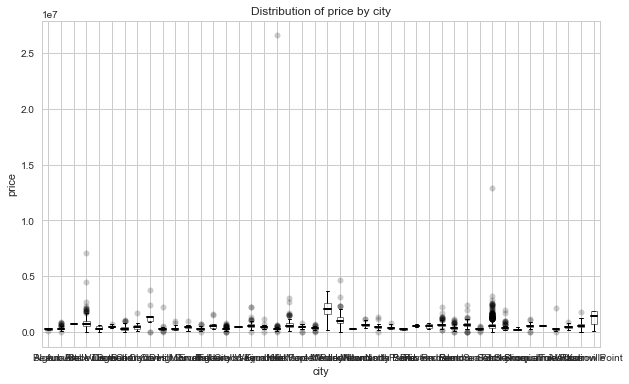

In [18]:
multiboxplot(eda_data, "price", "city")

The number of different cities in this data set makes it difficult to deep dive into this relationship, but the height of the box and whisker plots gives a good indication that certain cities drive a higher property price.

### Bathrooms vs. Price

There should be a clear positive correlation between number of bathrooms in a property and its sale price.

In [19]:
correlation(eda_data, "bathrooms", "price")

Correlation coefficients:
r   = 0.3271099182877348
rho = 0.49245128595002247


A moderately strengthed correlation. Expected this to be stronger but there could be multicolinearity at play here.

### Floors vs. Price

As discussed briefly in single variable EDA, the distribution of this variable may or may not be influenced by the square footage distribution. It'll be important to check out multicolinearity between the two but this relationship should be positive.

In [20]:
correlation(eda_data, "floors", "price")

Correlation coefficients:
r   = 0.15146080053677774
rho = 0.3209291991145739


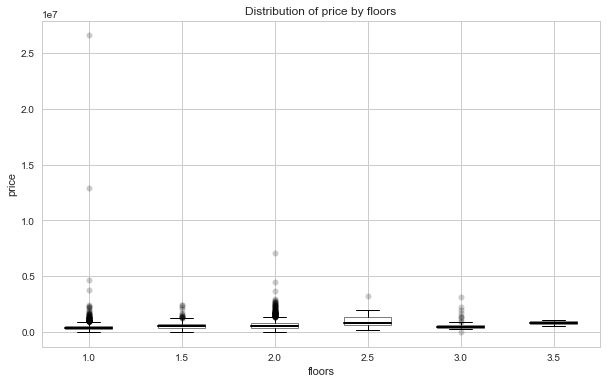

In [21]:
multiboxplot(eda_data, "price", "floors")

The outliers are impacted how these distributions are analyzed. Removing them should clean it up and help yield some insight.

In [22]:
eda_data = eda_data[eda_data.price < 2000000]

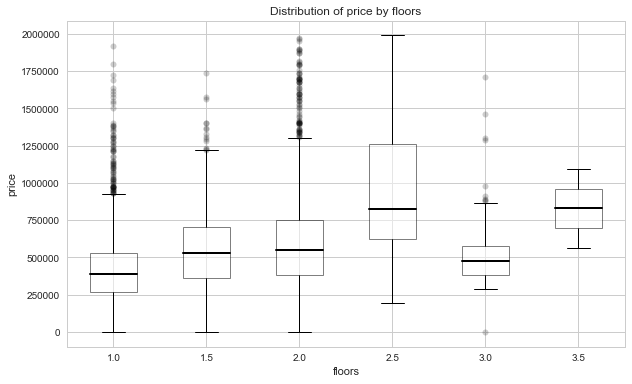

In [23]:
multiboxplot(eda_data, "price", "floors")

That's much better. It looks like 2.5 floors is dominating in terms of yielding a higher price. That is a relationship that should be looked into.